## Generación de Archivos .vasp de la Estructuras Rotadas ##

In [1]:
from ase.build import bulk
from ase.visualize.plot import plot_atoms
from ase.build.surfaces_with_termination import surfaces_with_termination
import matplotlib.pyplot as plt
import numpy as np
import Tools as tl


In [2]:
zrhcp = bulk('Zr', crystalstructure='hcp')
zrortho = bulk('Zr', crystalstructure='hcp', orthorhombic=True)

In [3]:
Zr11m20 = surfaces_with_termination(zrortho, (1, 0, 0), 5, vacuum=10, termination='Zr')

In [4]:
rotated = []
dang = 15  # saltos entre los ángulos siguientes
plano = '11m20'
for ang in range(75, 91, dang):
    rotated.append(Zr11m20[0].copy())
    rotated[-1].center()
    rotated[-1].rotate(ang, 'z', center="com")
    name = f'{ang}_{plano}_rotated.vasp'
    rotated[-1].write(name, direct=True, sort=True)

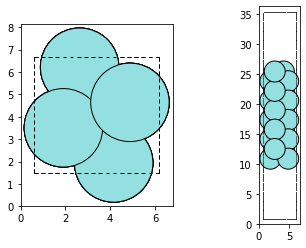

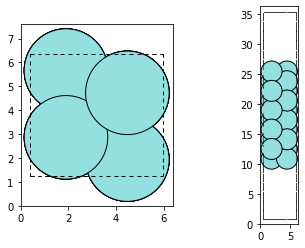

In [5]:
for i, thisatoms in enumerate(rotated):
    fig, ax = plt.subplots(1, 2)
    plot_atoms(thisatoms, ax=ax[0])
    plot_atoms(thisatoms, ax=ax[1], rotation="90x")

# Probamos funcion adsite #

In [6]:
tl.get_adsite(rotated[-1], site = 'top', face='bottom') #bottom porque es el metal

{'bottom': {'top': array([ 4.08360955,  0.70785363, 10.        ])}}

In [7]:
rotated[-1].info #diccionario adatom de la cara bottom ne la pos bot y sus coordenadas

{'adatom': {'bottom': {'top': array([ 4.08360955,  0.70785363, 10.        ])}}}

In [8]:
RotatedAdstruc = tl.make_adstruc(rotated[-1],'RotBotTop', theface='bottom', thesite='top')

<AxesSubplot:>

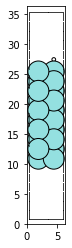

In [11]:
plot_atoms(RotatedAdstruc,rotation ="90x")